In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import os

from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import load_model, Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout

/home/pk/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/pk/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/pk/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/pk/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: P

In [2]:
data = []
labels = [] 
classes = 43
cur_path = os.getcwd()

In [3]:
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((50,50))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
        except:
            print("Error loading Image")
            
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 50, 50, 3) (39209,)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 50, 50, 3) (7842, 50, 50, 3) (31367,) (7842,)


In [5]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [6]:
input_signal = Input(shape=(x_train.shape[1:]))

conv1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(input_signal)
conv2 = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(conv1)
pool1 = MaxPool2D(pool_size=(2,2))(conv2)
drop1 = Dropout(0.25)(pool1)

conv3 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(drop1)
conv4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv3)
pool2 = MaxPool2D(pool_size=(2,2))(conv4)
drop2 = Dropout(0.25)(pool2)

conv5 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(drop2)
conv6 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv5)
pool3 = MaxPool2D(pool_size=(2,2))(conv6)
drop3 = Dropout(0.25)(pool3)

flat = Flatten()(drop3)
hidden1 = Dense(256, activation='relu')(flat)
drop = Dropout(0.25)(hidden1)
out = Dense(43, activation='softmax')(drop)

model = Model(input_signal, out)
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test), verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 31367 samples, validate on 7842 samples
Epoch 1/25
31367/31367 [==============================] - 163s 5ms/step - loss: 1.8706 - acc: 0.5045 - val_loss: 0.3261 - val_acc: 0.9198
Epoch 2/25
31367/31367 [==============================] - 60s 2ms/step - loss: 0.4427 - acc: 0.8726 - val_loss: 0.1017 - val_acc: 0.9759
Epoch 3/25
31367/31367 [==============================] - 62s 2ms/step - loss: 0.2507 - acc: 0.9303 - val_loss: 0.0783 - val_acc: 0.9793
Epoch 4/25
31367/31367 [==============================] - 59s 2ms/step - loss: 0.1810 - acc: 0.9484 - val_loss: 0.0610 - val_acc: 0.9828
Epoch 5/25
31367/31367 [==============================] - 58s 2ms/step - loss: 0.1350 - acc: 0.9624 - val_loss: 0.0325 - val_acc: 0.9918
Epoch 6/25
31367/31367 [==============================] - 58s 2ms/step - loss: 0.1196 - acc: 0.9664 - val_loss: 0.0314 - val_acc: 0.9915
Epoch 7/25
31367/31367 [==============================] - 58s 2ms/step - loss: 0

In [8]:
model.save('traffic_signal.h5')

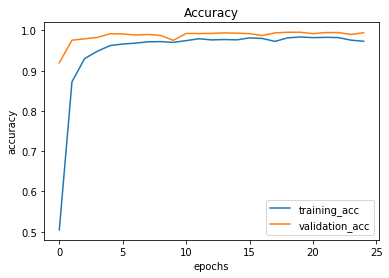

In [9]:
plt.figure(0)
plt.plot(history.history['acc'], label='training_acc')
plt.plot(history.history['val_acc'], label='validation_acc')
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

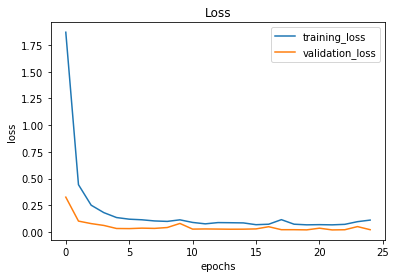

In [10]:
plt.figure(1)
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title("Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
y = pd.read_csv('Test.csv')

labels = y['ClassId'].values
imgs = y['Path'].values

In [13]:
test_data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((50,50))
    test_data.append(np.array(image))
    
x = np.array(test_data)

In [14]:
pred = model.predict(x)
pred = pred.argmax(axis=-1)

In [15]:
print(accuracy_score(labels, pred))

0.9790182106096595
